In [ ]:
import sys, os

# add project root (one level up from notebooks/) to Python path
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
import pandas as pd
from src.config import DATA_DIR

data_path = DATA_DIR / "CyberBulling_Dataset_Bangla.xlsx"
df = pd.read_excel(data_path)
df.head()

,Unnamed: 0,Description,Label
0,0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,sexual
1,1,আপনার জন্ম প্রক্রিয়ার সময় আপনার মায়ের ভিতর কি ...,sexual
2,2,ধজভংগ দের আর ভায়াগ্রা লাগবো না। ধংস হোক এই সব ...,sexual
3,3,বোকাচোদা একটা।,sexual
4,4,তোর দেশে ফেরার অপেক্ষায় রইলাম। জেলে একটা কামরা...,sexual


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Drop index-like column
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
df.head()


,Description,Label
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,sexual
1,আপনার জন্ম প্রক্রিয়ার সময় আপনার মায়ের ভিতর কি ...,sexual
2,ধজভংগ দের আর ভায়াগ্রা লাগবো না। ধংস হোক এই সব ...,sexual
3,বোকাচোদা একটা।,sexual
4,তোর দেশে ফেরার অপেক্ষায় রইলাম। জেলে একটা কামরা...,sexual


In [6]:
# Basic info
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nInfo:")
print(df.info())
print("\nMissing values:")
print(df.isna().sum())


Shape: (6010, 2)

Columns: ['Description', 'Label']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6010 entries, 0 to 6009
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  6010 non-null   object
 1   Label        6010 non-null   object
dtypes: object(2)
memory usage: 94.0+ KB
None

Missing values:
Description    0
Label          0
dtype: int64


In [7]:
# Label distribution
print("\nLabel distribution:")
print(df['Label'].value_counts())
print("\nLabel distribution (proportion):")
print(df['Label'].value_counts(normalize=True))

# normalise labels to lower-case
print("\nLabels after normalisation:")
df['Label'] = df['Label'].str.lower()
print(df['Label'].value_counts())



Label distribution:
Label
Political    1205
troll        1202
sexual       1201
Threat       1201
Neutral      1201
Name: count, dtype: int64

Label distribution (proportion):
Label
Political    0.200499
troll        0.200000
sexual       0.199834
Threat       0.199834
Neutral      0.199834
Name: proportion, dtype: float64

Labels after normalisation:
Label
political    1205
troll        1202
sexual       1201
threat       1201
neutral      1201
Name: count, dtype: int64


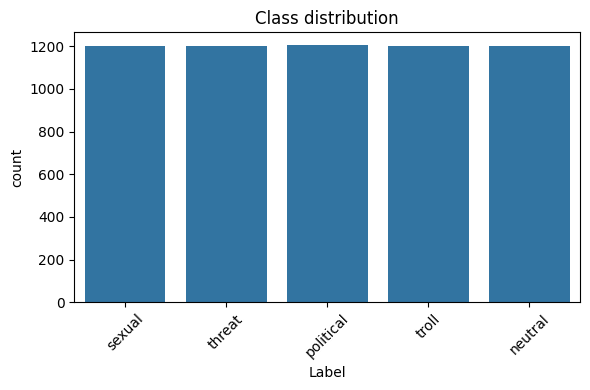

In [8]:
# Plot label distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Label', data=df)
plt.title("Class distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Text length features
df['char_len'] = df['Description'].astype(str).str.len()
df['word_len'] = df['Description'].astype(str).str.split().str.len()

print("\nCharacter length stats:")
print(df['char_len'].describe())
print("\nWord length stats:")
print(df['word_len'].describe())



Character length stats:
count    6010.000000
mean      100.505491
std       138.341176
min         2.000000
25%        29.000000
50%        56.000000
75%       112.000000
max      1767.000000
Name: char_len, dtype: float64

Word length stats:
count    6010.000000
mean       17.395175
std        22.757677
min         1.000000
25%         5.000000
50%        10.000000
75%        19.000000
max       210.000000
Name: word_len, dtype: float64


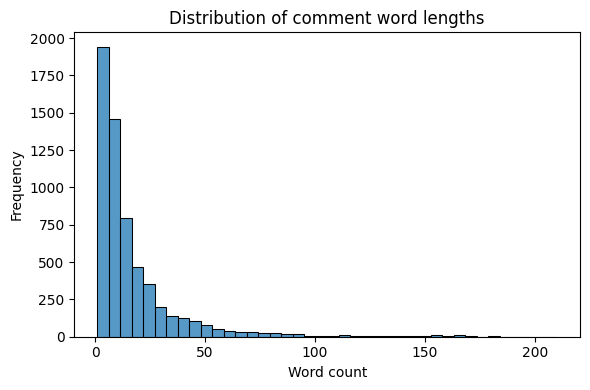

In [10]:
# Histograms of length
plt.figure(figsize=(6,4))
sns.histplot(df['word_len'], bins=40)
plt.title("Distribution of comment word lengths")
plt.xlabel("Word count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



In [11]:
print(df[df['Description'].astype(str).str.len()< 5])

     Description    Label  char_len  word_len
26          নুনু   sexual         4         1
328         মাগি   sexual         4         1
968          মাল   sexual         3         1
1237         চোপ   threat         3         1
1724          মর   threat         2         1
2002        কোপা   threat         4         1
3763        নেশা    troll         4         1
4220         বাল    troll         3         1
4254        ময়দা    troll         4         1
4285        শালা    troll         4         1
4689         বলত    troll         3         1
5082        উফ!!  neutral         4         1
5125        সোফা  neutral         4         1
5401        মাখন  neutral         4         1
5626        ময়না  neutral         4         1
5642        কুইন  neutral         4         1
5798        বাকি  neutral         4         1
5939        সহমত  neutral         4         1
5980        বইনে  neutral         4         1


In [12]:
# Length by label
print("\nLength by label:")
print(df.groupby('Label')[['char_len', 'word_len']].agg(['mean', 'std', 'min', 'max']))


Length by label:
             char_len                         word_len                    
                 mean         std min   max       mean        std min  max
Label                                                                     
neutral     77.525396  111.600237   4  1000  12.836803  17.514708   1  180
political  115.214108  105.591392  17   498  20.119502  18.157506   3   95
sexual     124.567027  189.669614   3  1767  21.270608  30.091763   1  210
threat      97.727727  145.495555   2  1000  17.188177  24.576877   1  183
troll       87.455075  116.341282   3  1000  15.553245  19.982321   1  180



 --------- Length stats per label: ---------
          char_len                          word_len                       
              mean median     std min   max     mean median    std min  max
Label                                                                      
neutral      77.53   42.0  111.60   4  1000    12.84    7.0  17.51   1  180
political   115.21   75.0  105.59  17   498    20.12   13.0  18.16   3   95
sexual      124.57   62.0  189.67   3  1767    21.27   11.0  30.09   1  210
threat       97.73   49.0  145.50   2  1000    17.19    8.0  24.58   1  183
troll        87.46   48.0  116.34   3  1000    15.55    9.0  19.98   1  180


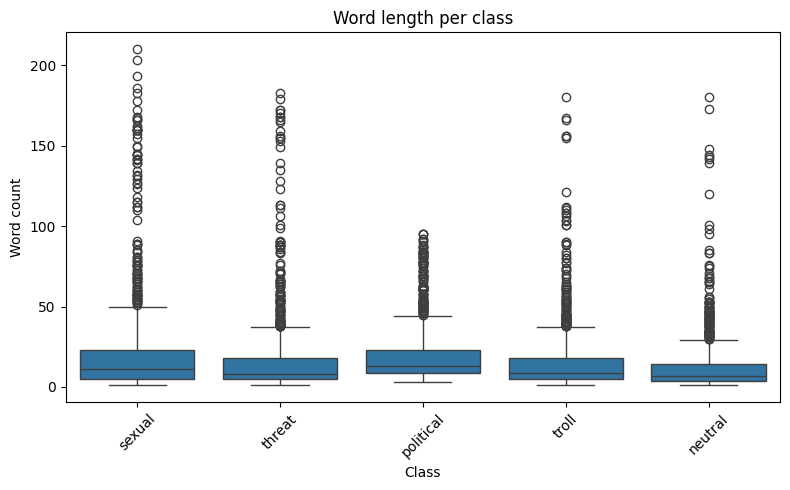

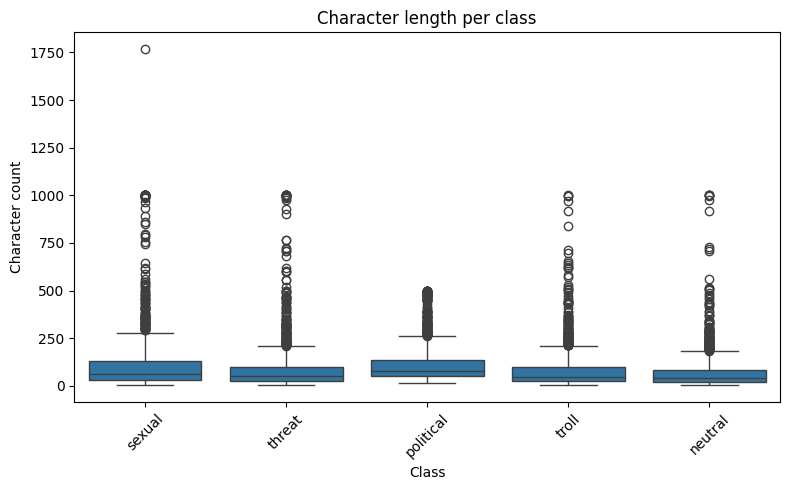

In [13]:
# Summary stats per label
length_stats = (
    df.groupby("Label")[["char_len", "word_len"]]
      .agg(["mean", "median", "std", "min", "max"])
      .round(2)
)
print("\n --------- Length stats per label: ---------")
print(length_stats)

# Boxplot: word length by label
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Label", y="word_len")
plt.title("Word length per class")
plt.xlabel("Class")
plt.ylabel("Word count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot: character length by label
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Label", y="char_len")
plt.title("Character length per class")
plt.xlabel("Class")
plt.ylabel("Character count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# from collections import Counter
# from sklearn.feature_extraction.text import CountVectorizer

# N-gram & keyword patterns per class

def top_terms_for_class(df, label_col, text_col, target_label, n_top=15, ngram_range=(1, 1), min_df=1):
    """
    Compute top n terms for a given class using simple frequency with CountVectorizer.
    """
    texts = df[df[label_col] == target_label][text_col].tolist()

    vectorizer = CountVectorizer(
        analyzer="word",
        ngram_range=ngram_range,
        min_df=min_df
    )
    X = vectorizer.fit_transform(texts)
    freqs = np.asarray(X.sum(axis=0)).ravel()
    terms = np.array(vectorizer.get_feature_names_out())

    top_idx = freqs.argsort()[::-1][:n_top]
    top_terms = pd.DataFrame({
        "term": terms[top_idx],
        "frequency": freqs[top_idx]
    })
    return top_terms

labels = sorted(df["Label"].unique())

# Top unigrams per class
top_unigrams_per_class = {}
for lbl in labels:
    print(f"\n---- Top unigrams for class: {lbl} -----")
    top_uni = top_terms_for_class(
        df=df,
        label_col="Label",
        text_col="Description",
        target_label=lbl,
        n_top=15,
        ngram_range=(1, 1),
        min_df=2,
    )
    top_unigrams_per_class[lbl] = top_uni
    print(top_uni.to_string(index=False))




---- Top unigrams for class: neutral -----
term  frequency
  কর        513
 আপন        302
  আল        250
  আম        239
  অন        161
  জন        158
  আর        134
  মন        125
  বল        124
  এই        108
  পর        107
  সব        104
  হয়        103
  দর        102
  হব         80

---- Top unigrams for class: political -----
term  frequency
  রত        636
  কর        562
  আর        331
  আম        331
  হয়        250
  জন        247
  এই        214
  মন        181
  বল        178
  হল        178
 একট        152
  সব        142
  কথ        130
  পর        125
  হব        122

---- Top unigrams for class: sexual -----
term  frequency
  কর        834
  আম        356
  আল        314
 আপন        309
  আর        239
  বল        235
  জন        234
  পর        201
  কথ        185
  সব        182
  হয়        180
  মন        178
  এই        178
  হল        169
 একট        164

---- Top unigrams for class: threat -----
term  frequency
  কর        731
 আপন        217
  এই    

/var/folders/y_/915f7xdj6rj1jcxp6zd5k9lw0000gn/T/ipykernel_67272/2104576070.py:10: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/y_/915f7xdj6rj1jcxp6zd5k9lw0000gn/T/ipykernel_67272/2104576070.py:10: UserWarning: Matplotlib currently does not support Bengali natively.
  plt.tight_layout()
/var/folders/y_/915f7xdj6rj1jcxp6zd5k9lw0000gn/T/ipykernel_67272/2104576070.py:10: UserWarning: Glyph 2468 (\N{BENGALI LETTER TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/y_/915f7xdj6rj1jcxp6zd5k9lw0000gn/T/ipykernel_67272/2104576070.py:10: UserWarning: Glyph 2453 (\N{BENGALI LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/y_/915f7xdj6rj1jcxp6zd5k9lw0000gn/T/ipykernel_67272/2104576070.py:10: UserWarning: Glyph 2438 (\N{BENGALI LETTER AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/y_/915f7xdj6rj1jcxp6zd5k9lw0000gn/T/ipykernel_67272/2104576070.py:10: 

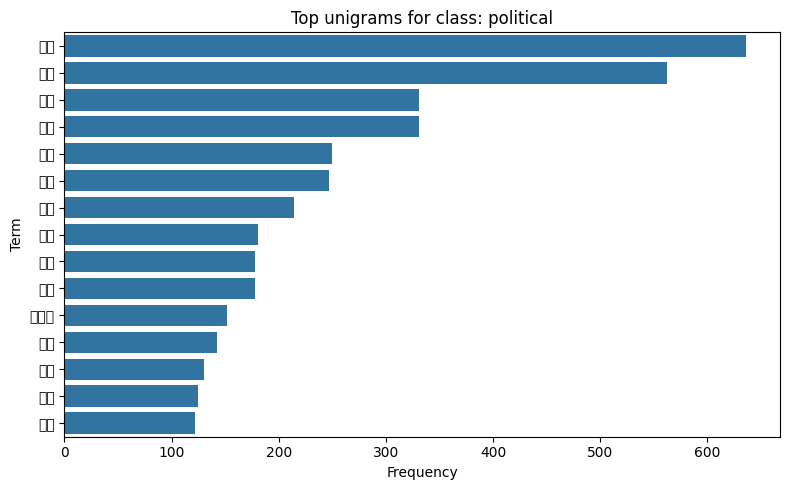

In [15]:
# Example of plotting top terms for one label
example_label = labels[1]
top_uni = top_unigrams_per_class[example_label]

plt.figure(figsize=(8, 5))
sns.barplot(data=top_uni, x="frequency", y="term")
plt.title(f"Top unigrams for class: {example_label}")
plt.xlabel("Frequency")
plt.ylabel("Term")
plt.tight_layout()
plt.show()


=== Proportion of comments with code-mixing/emojis/punctuation per label ===
       Label  has_latin  has_emoji  has_excl  has_qmark
0    neutral   0.059117   0.000000  0.104913   0.110741
1  political   0.000000   0.000000  0.009959   0.079668
2     sexual   0.041632   0.001665  0.104080   0.179850
3     threat   0.036636   0.000000  0.057452   0.074938
4      troll   0.042429   0.000000  0.098170   0.145591


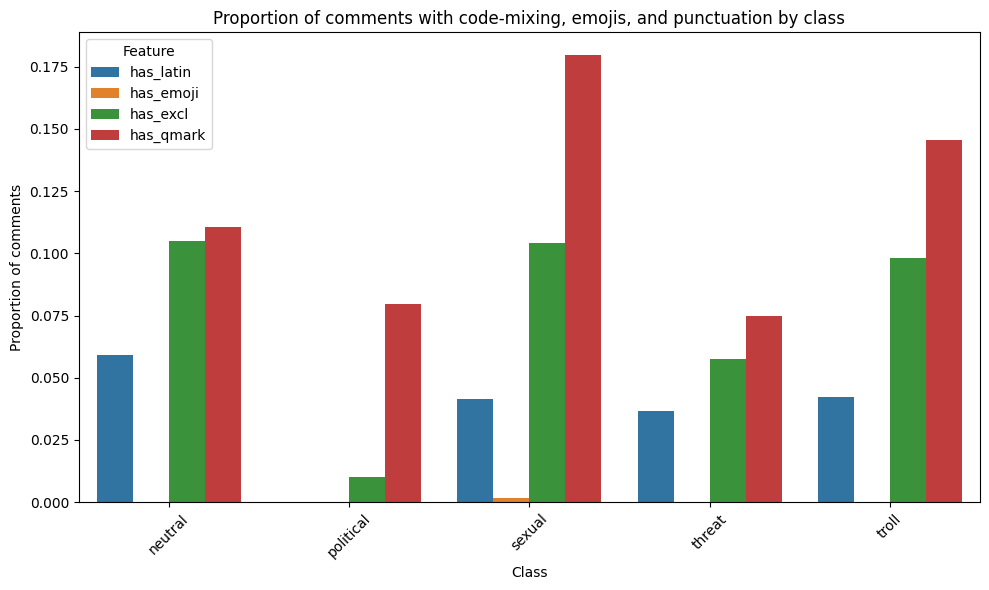

In [16]:
import re

# Code-mixing, emojis and punctuation

# Regex patterns
latin_pattern = re.compile(r"[A-Za-z]")
bangla_pattern = re.compile(r"[\u0980-\u09FF]")

# Emoji ranges (approximate)
emoji_pattern = re.compile(
    "["
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"
    "\U0001F780-\U0001F7FF"
    "\U0001F800-\U0001F8FF"
    "\U0001F900-\U0001F9FF"
    "\U0001FA00-\U0001FA6F"
    "\U0001FA70-\U0001FAFF"
    "]+"
)

def has_latin(text):
    return bool(latin_pattern.search(text))

def has_bangla(text):
    return bool(bangla_pattern.search(text))

def has_emoji(text):
    return bool(emoji_pattern.search(text))

def count_char(text, ch):
    return text.count(ch)

df["has_latin"] = df["Description"].apply(has_latin)
df["has_bangla"] = df["Description"].apply(has_bangla)
df["has_emoji"] = df["Description"].apply(has_emoji)

df["num_excl"] = df["Description"].apply(lambda x: count_char(x, "!"))
df["num_qmark"] = df["Description"].apply(lambda x: count_char(x, "?"))
df["has_excl"] = df["num_excl"] > 0
df["has_qmark"] = df["num_qmark"] > 0

code_mix_stats = (
    df.groupby("Label")[["has_latin", 
                        #"has_bangla",
                         "has_emoji", 
                         "has_excl", 
                         "has_qmark"]]
      .mean()
      .reset_index()
)

print("\n=== Proportion of comments with code-mixing/emojis/punctuation per label ===")
print(code_mix_stats)

# Melt for plotting
plot_df = code_mix_stats.melt(id_vars="Label", var_name="feature", value_name="proportion")

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x="Label", y="proportion", hue="feature")
plt.title("Proportion of comments with code-mixing, emojis, and punctuation by class")
plt.xlabel("Class")
plt.ylabel("Proportion of comments")
plt.xticks(rotation=45)
plt.legend(title="Feature")
plt.tight_layout()
plt.show()



Number of very short comments (<= 2 words): 375
Short comments per label:
Label
neutral    148
troll      109
sexual      86
threat      32
Name: count, dtype: int64

Sample very short comments:
 Label      Description
sexual   বোকাচোদা একটা।
sexual             নুনু
sexual     সেক্সি গার্ল
sexual   ছ্যাচড়া ব্যাটা
sexual  নাতাশা মাল্কোভা
sexual       শাউয়ার গান
sexual   গরীবের মালকোভা
sexual      ঠুস,ঠুস,ঠুস
sexual         জারজ....
sexual     আচুদা একটা।।
sexual      শতভাতারি :/
sexual      খাড়া খাড়া
sexual        হোগার গান
sexual     শূকরের বীর্য
sexual        নুনুস্রাত
sexual         ওরে মাগী
sexual অশ্লীলতার তুঙ্গে
sexual     মাগি নাম্বার
sexual   মাগিরা বহুরুপি
sexual      খোলা পাজামা

Threshold for very long comments (95th percentile): 57.0 words
Number of very long comments: 312
Long comments per label:
Label
sexual       96
political    76
threat       67
troll        47
neutral      26
Name: count, dtype: int64

Sample very long comments:
 Label  word_len                     

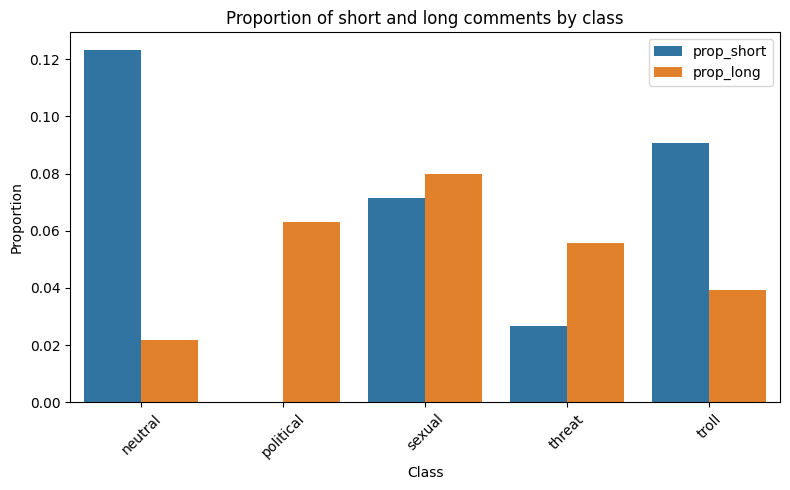

In [17]:
# Noise and quality checks (short & long comments, potential issues)

# Short comments (e.g. <= 2 words)
short_threshold = 2
short_df = df[df["word_len"] <= short_threshold]
print(f"\nNumber of very short comments (<= {short_threshold} words): {len(short_df)}")
print("Short comments per label:")
print(short_df["Label"].value_counts())

print("\nSample very short comments:")
print(short_df[["Label", "Description"]].head(20).to_string(index=False))

# Very long comments (e.g. >= 95th percentile by word_len)
p95 = np.percentile(df["word_len"], 95)
long_df = df[df["word_len"] >= p95]
print(f"\nThreshold for very long comments (95th percentile): {p95} words")
print(f"Number of very long comments: {len(long_df)}")
print("Long comments per label:")
print(long_df["Label"].value_counts())

print("\nSample very long comments:")
print(long_df[["Label", "word_len", "Description"]].head(10).to_string(index=False))

# Distribution of very short / very long ratios by label
df["is_short"] = df["word_len"] <= short_threshold
df["is_long"] = df["word_len"] >= p95

noise_stats = (
    df.groupby("Label")[["is_short", "is_long"]]
      .mean()
      .reset_index()
      .rename(columns={"is_short": "prop_short", "is_long": "prop_long"})
)

print("\n=== Proportion of very short / very long comments per label ===")
print(noise_stats)

plt.figure(figsize=(8, 5))
noise_plot = noise_stats.melt(id_vars="Label", var_name="type", value_name="proportion")
sns.barplot(data=noise_plot, x="Label", y="proportion", hue="type")
plt.title("Proportion of short and long comments by class")
plt.xlabel("Class")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="")
plt.tight_layout()
plt.show()

In [18]:
# Duplicates
dup_rows = df.duplicated(subset=['Description', 'Label']).sum()
print(f"\nNumber of exact duplicate rows (text + label): {dup_rows}")
if dup_rows > 0:
    print("Sample duplicate rows:")
    print(df[df.duplicated(subset=['Description', 'Label'], keep=False)].sort_values(by='Description').head(10))

# Remove Dupicates rows
df = df.drop_duplicates(subset=['Description', 'Label']).reset_index(drop=True)
print("Shape after dropping duplicates:", df.shape)



Number of exact duplicate rows (text + label): 150
Sample duplicate rows:
                                            Description      Label  char_len  \
2410  অ্যাটনি জেনারেল পদত্যাগ করলে রাজাকারদের ফাসি দ...  political        52   
2597  অ্যাটনি জেনারেল পদত্যাগ করলে রাজাকারদের ফাসি দ...  political        52   
2418  অ্যাটনি জেনারেল পদত্যাগ করলে রাজাকারদের ফাসি দ...  political        52   
2458  আ লীগ আজব মেশিন ভেতর দিয়ে গেলে স্বাধীনতার পক্ষ...  political       134   
2506  আ লীগ আজব মেশিন ভেতর দিয়ে গেলে স্বাধীনতার পক্ষ...  political       134   
2830  আইসে আরেকজন জাহিদ মানিক আপনার নিজের দেশে যে প্...  political       188   
2709  আইসে আরেকজন জাহিদ মানিক আপনার নিজের দেশে যে প্...  political       188   
2881  আওমলীগ না কি হিনদদে পোজা করে শিবির বিএনপি বলে ...  political        90   
2949  আওমলীগ না কি হিনদদে পোজা করে শিবির বিএনপি বলে ...  political        90   
2627  আওয়ামীলীগ চেতনাবাজ ব্যবসায়ীরা কোথায় বাংলাদেশের...  political       288   

      word_len  has_latin  has_bangla  has_e

In [19]:
# Sample examples per class
for label in df['Label'].unique():
    print(f"\n --- Examples for class: {label} --- ")
    print(df[df['Label'] == label]['Description'].head(3).to_string(index=False))


 --- Examples for class: sexual --- 
ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা ...
আপনার জন্ম প্রক্রিয়ার সময় আপনার মায়ের ভিতর কি আ...
ধজভংগ দের আর ভায়াগ্রা লাগবো না। ধংস হোক এই সব ক...

 --- Examples for class: threat --- 
তুই কই থেকে এসেছ সেটা কি জানিস?সেটাকি দেখেশিস?ত...
                       সে ভোট ডাকাত সরকারের এজেন্ট
জুতা দিয়ে তোমার গালে মারা উচিত, আবাল বক্তব্য দি...

 --- Examples for class: political --- 
ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পার...
     রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে
এইসব ঐক্যধারীরা বাংলাদেশের একটা ওয়ার্ডের চৌকিদা...

 --- Examples for class: troll --- 
                                          পটকা মাছ
সাংবাদিক ভাইদের বলছি এই সংবাদ গুলি প্রচার না কর...
হিরো আলমের দেয়া বিনোদন ব্যক্তিগতভাবে আমার একটু...

 --- Examples for class: neutral --- 
ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছিলেন?
                      অরে বাবা, এই টা কোন পাগল????
                             ক্যাপ্টেন অফ বাংলাদেশ


In [26]:
import collections
import unicodedata

data_path = DATA_DIR / "CyberBulling_Dataset_Bangla.xlsx"
df_raw = pd.read_excel(data_path)

all_text = " ".join(df_raw["Description"].astype(str).tolist())

char_counts = collections.Counter(ch for ch in all_text)

special_chars = []
for ch, cnt in char_counts.items():
    if not (ch.isalnum() or ch.isspace()):
        special_chars.append({
            "char": ch,
            "count": cnt,
            "unicode_name": unicodedata.name(ch, "UNKNOWN")
        })

special_chars_df = pd.DataFrame(special_chars).sort_values("count", ascending=False)

# Show top 50 special characters
special_chars_df.head(100)
#pd.set_option('display.max_rows', None)

,char,count,unicode_name
0,া,63422,BENGALI VOWEL SIGN AA
4,ে,42622,BENGALI VOWEL SIGN E
2,ি,25760,BENGALI VOWEL SIGN I
5,্,18814,BENGALI SIGN VIRAMA
1,ু,11508,BENGALI VOWEL SIGN U
7,ো,8645,BENGALI VOWEL SIGN O
8,।,5310,DEVANAGARI DANDA
15,",",3817,COMMA
13,ী,3098,BENGALI VOWEL SIGN II
11,.,3078,FULL STOP


In [30]:

# all chars (ordered by frequency) in parentheses to use later in regex "Data Preparation"
all_chars = ''.join(special_chars_df['char'].astype(str).tolist())
print(f"({all_chars})")


(ােি্ুো।,ী.ং?়!-ঁূৃ‌"ৌ/ৈ:ঃ%)*(='❤#_~&️✌’♥|;‍☺+‘…>♦”“َِ<–@ْ♂🤣✅🙄❗☝✋★⛵^]»[ُّ♠\⚫✔—৤❣॥✊{}∆)


In [ ]:
import re

# 1) Long repeated characters: any single char repeated 5+ times
repeat_pattern = re.compile(r"(.)\1{4,}")

# 2) Decorative separators: sequences of at least 3 of these chars
#    we do NOT include ':' '/' '@' so URLs are safe
separator_pattern = re.compile(r"[-=*_+•●♦♠♥০0∆॥❣✔⚫]{3,}")

def has_noisy_pattern(text: str) -> bool:
    if not isinstance(text, str):
        text = str(text)
    return bool(repeat_pattern.search(text) or separator_pattern.search(text))

# Apply to dataframe (you can use df_raw or df after cleaning)
noise_mask = df_raw["Description"].astype(str).apply(has_noisy_pattern)
noisy_rows = df_raw[noise_mask]

print("Number of rows with noisy patterns:", noisy_rows.shape[0])
noisy_rows.head(50)

Number of rows with noisy patterns: 212


,Unnamed: 0,Description,Label
0,0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,sexual
8,8,নিজের রিভিউ বারানোর জন্যই জতো সব নাটক? ফালতু.....,sexual
89,89,"আপনি তো আল্লাহতে বিশ্বাসই করেন না, তাহলে আবার ...",sexual
93,93,হিরো আলম এর ভাষা শুনে মনে হচ্ছে আবাল ছাবাল মিড...,sexual
105,105,নিরাপদ সড়ক চেয়ে ছেলে মেয়েরা পুলিশকে উদ্দেশ্য ক...,sexual
116,116,চুদির ভাই মিশা কোন দেশে বাস করে যে হিরো আলমকে ...,sexual
129,129,সে একটা ম***,sexual
158,158,"আসসালামু আলাইকুম'।♦""হিজবুত খবিশ"" যে মুসলমান না...",sexual
230,230,"তুই!! মাগী যা দেখিস না,,,তা তো বিশ্বাস করিস না...",sexual
236,236,কি যে কমু.......ওর পাছার মধ্যে ব্যাগ দিয়ে ত্রস...,sexual


In [28]:
# Add a noise flag/ratio on cleaned df
df["has_noisy_pattern"] = df["Description"].astype(str).apply(has_noisy_pattern)

print(df["has_noisy_pattern"].mean())  # proportion of noisy rows overall
print(df.groupby("Label")["has_noisy_pattern"].mean())

0.03583617747440273
Label
neutral      0.037500
political    0.000000
sexual       0.045188
threat       0.048658
troll        0.044277
Name: has_noisy_pattern, dtype: float64
